In [1]:
import tensorflow as tf

# Loading MNIST dataset

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense


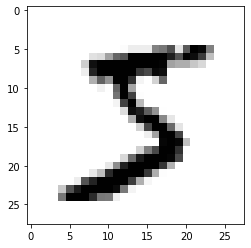

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Checking value of each pixel
## Before Normalization

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# As Images are in Gray level (1 channel -> 0 to 255), not colored(RGB)
## Normalizing the data | Pre p steprocessing

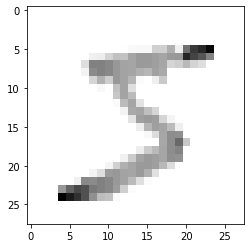

In [5]:
# As we have seen in grayscale image all values are in range 0-255, in order to normalize it we divide it by 255
x_train=tf.keras.utils.normalize(x_train, axis = 1)
x_test=tf.keras.utils.normalize(x_test,axis =1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

## After Normalization

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
print(y_train[0])

5


## Resizing image to make it suitable for apply Convolution operation

In [16]:
import numpy as np
x_trainr=np.array(x_train).reshape(-1,28,28,1) #here -1 corresponds to 60000 images present in dataset and 1 means we are adding extra dimension to do convolution operatin
x_testr=np.array(x_test).reshape(-1,28,28,1)
print(x_trainr.shape)

(60000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [10]:
model=Sequential()

### First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) # one convollution layer with 64 different kernel or filter with each of size 3*3 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second Convolution Layer
model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Third Convolution Layer
model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Finally Connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Last Fully connected Layer, output must be 10(0-9)
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [12]:
## here validation_split means we are dividing x_train into 70 and 30 ratio in which 70 is used for traning and 30 is used for validation
model.fit(x_trainr,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2394 - accuracy: 0.9246
Epoch 2/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0749 - accuracy: 0.9759


In [17]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0711 - accuracy: 0.9781
0.07105252146720886
0.9781000018119812


In [18]:
### Here we are going to the priction on basis of of test dataset

prediction=model.predict([x_testr])

In [19]:
print(prediction)

[[5.6747342e-07 5.4059171e-07 7.6177734e-05 ... 9.9965155e-01
  1.9562615e-06 1.7011529e-05]
 [1.0345482e-03 1.3754088e-04 9.9872929e-01 ... 9.0287909e-07
  9.9884492e-06 1.3074552e-07]
 [3.3565482e-06 9.9985087e-01 1.2258175e-06 ... 4.2617944e-06
  3.5786692e-05 3.2008546e-05]
 ...
 [7.8004527e-09 2.2713479e-05 9.3054844e-09 ... 4.8811523e-07
  1.5587785e-04 7.3358751e-05]
 [5.7907241e-06 4.0714960e-09 9.4303032e-06 ... 1.7345981e-08
  2.6437274e-01 5.8755013e-06]
 [5.2039602e-05 3.7330693e-08 1.5385936e-04 ... 9.4155672e-10
  2.5271572e-06 1.7051197e-07]]


In [20]:
print(np.argmax(prediction[0])) #It will print the predicted value present at prediction[0]

7


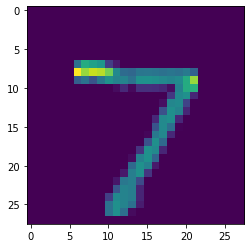

In [21]:
plt.imshow(x_testr[0]) # Here we are just confirming that the prediction is right or wrong

In [22]:
print(np.argmax(prediction[112]))

3


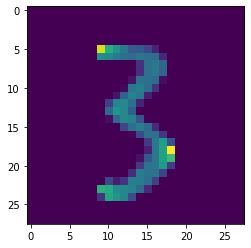

In [23]:
plt.imshow(x_testr[112])

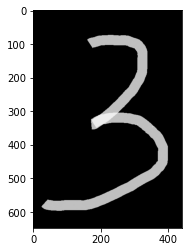

In [21]:
import cv2
 
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("3.png")
 
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
plt.imshow(img)

In [22]:
img.shape

(648, 444, 3)

In [23]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [24]:
gray.shape

(648, 444)

In [25]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [26]:
resized.shape

(28, 28)

In [27]:
nor=tf.keras.utils.normalize(resized,axis=1)

In [28]:
nor=np.array(nor).reshape(-1,28,28,1)

In [29]:
nor.shape

(1, 28, 28, 1)

In [30]:
m=model.predict(nor)

In [31]:
print(np.argmax(m))

3
